# Criteo Attribution Modeling for Bidding (EDA on data subset)

## 1. Overview data
Columns of the data subset:

| Column name | Description |
| --- | ----------- |
| timestamp | Timestamp of the impression (starting from 0 for the first impression). The dataset is sorted according to timestamp.|
| uid | Unique user identifier|
| campaign | Unique identifier for the campaign|
| conversion 1 | If there was a conversion in the 30 days after the impression (independently of whether this impression was last click or not)|
| conversion_timestamp | The timestamp of the conversion or -1 if no conversion was observed conversion_id a unique identifier for each conversion (so that timelines can be reconstructed if needed). -1 if there was no conversion |
| attribution 1 | If the conversion was attributed to Criteo, 0 otherwise |
| click 1 | If the impression was clicked, 0 otherwise |
| click_nb | Number of clicks. More than 1 if there was several clicks before a conversion |
| time_since_last_click | The time since the last click (in s) for the given impression |

In [1]:
# import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Floats (decimal numbers) should be displayed rounded with 2 decimal places
pd.options.display.float_format = "{:,.2f}".format
# Set style for plots
sns.set_theme(style="whitegrid")
plt.style.use('fivethirtyeight')

In [3]:
# read in csv file and display first 5 rows of the datset
df_subset = pd.read_csv("c:/Users/Maria/Desktop/ds_projects/attribution/data/processed/pcb_subset.csv")
df_subset.head()

,timestamp,uid,campaign,conversion,conversion_timestamp,conversion_id,attribution,click,click_pos,click_nb,cost,cpo,time_since_last_click,chain_segment,max_conversion_ts,after_conversion
0,3,7306395,29427842,1,1449193,3063962,0,1,0,7,0.00,0.15,-1,short (2-3),3673484,False
1,17,15394453,9100693,1,154,24795488,1,1,0,1,0.00,0.00,583864,short (2-3),1834922,False
2,25,6013772,15184511,1,138469,15587012,0,1,1,6,0.00,0.01,536,short (2-3),1147525,False
3,30,9451380,17321082,1,355909,4136014,0,1,1,3,0.00,0.32,363648,NaN,355909,False
4,93,2380977,32368244,1,1471679,28647208,0,1,5,8,0.00,0.02,145936,short (2-3),2927501,False


In [4]:
df_subset['uid'].value_counts()

uid
26251261    261
5872835     259
3620513     241
28610810    221
9164309     187
           ... 
15594434      2
30860759      2
1109830       2
29964671      2
3297131       2
Name: count, Length: 136969, dtype: int64

In [5]:
df_subset['uid'].value_counts()

uid
26251261    261
5872835     259
3620513     241
28610810    221
9164309     187
           ... 
15594434      2
30860759      2
1109830       2
29964671      2
3297131       2
Name: count, Length: 136969, dtype: int64

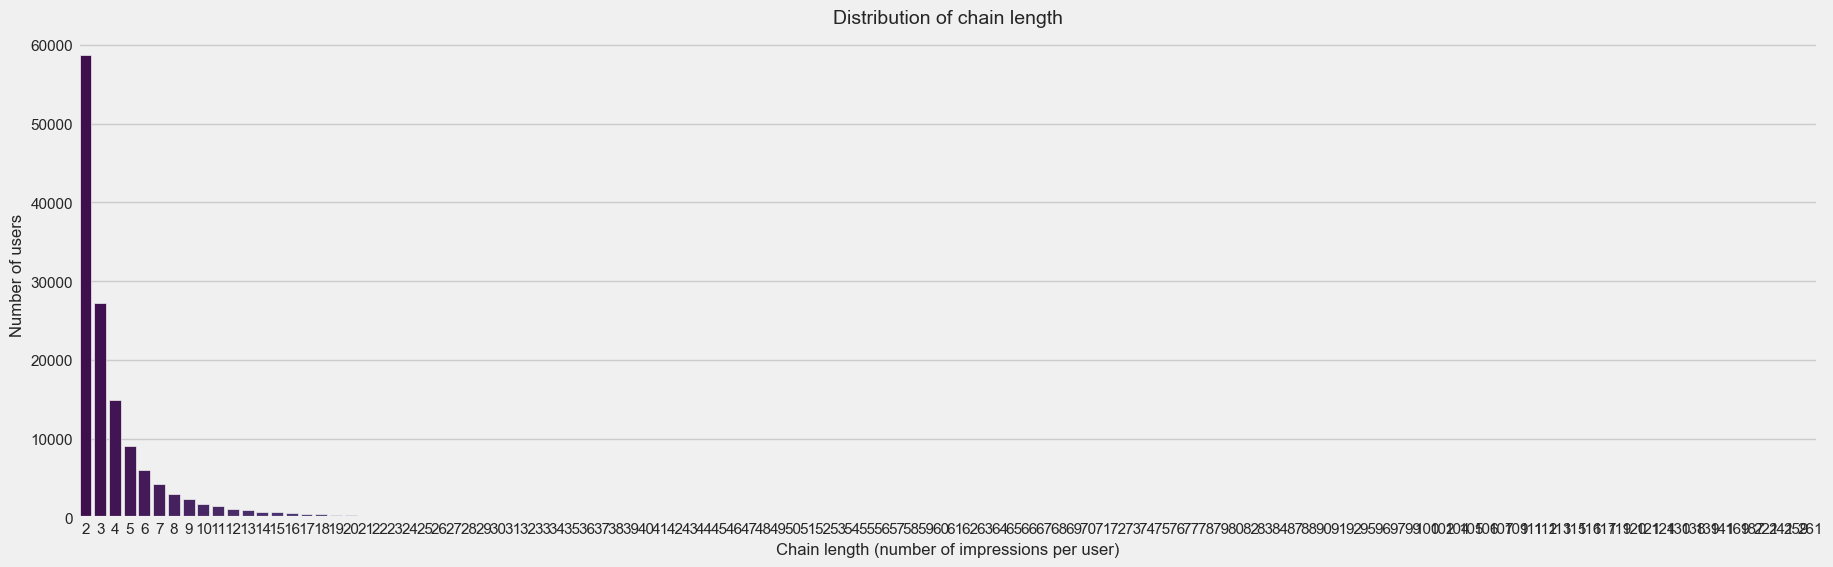

In [7]:
chain_lengths = df_subset['uid'].value_counts()
length_distribution = chain_lengths.value_counts().sort_index()

plt.figure(figsize=(20,6))
sns.barplot(x = length_distribution.index, y = length_distribution.values, palette="viridis")

plt.title("Distribution of chain length", fontsize = 14)
plt.xlabel("Chain length (number of impressions per user)", fontsize = 12)
plt.ylabel("Number of users", fontsize = 12)

plt.show()